In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table


import copy
import sys
import os
import warnings
warnings.filterwarnings('ignore')


from scipy.special import expit

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

## 1. Load, Split, and Balance (1.5 points total)

[.5 points] (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable.

In [2]:
census = pd.read_csv('acs2017_census_tract_data.csv')

In [3]:
census.head(10)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
5,1001020600,Alabama,Autauga County,3620,1765,1855,3.0,70.7,25.1,0.0,...,0.7,3.5,8.0,21.1,1364,84.0,14.1,1.9,0.0,6.1
6,1001020700,Alabama,Autauga County,3420,1459,1961,4.0,78.0,13.7,0.6,...,0.0,0.0,0.0,16.4,1418,77.4,17.6,5.0,0.0,16.9
7,1001020801,Alabama,Autauga County,2913,1495,1418,4.2,86.3,7.1,1.5,...,0.0,0.7,5.2,24.6,1369,72.7,17.5,8.8,1.0,7.2
8,1001020802,Alabama,Autauga County,11333,5488,5845,1.4,81.8,15.3,0.0,...,0.0,0.0,2.2,27.4,4857,70.1,22.5,7.4,0.0,2.2
9,1001020900,Alabama,Autauga County,6167,3111,3056,1.0,86.2,9.7,0.8,...,0.0,5.0,5.9,35.6,2781,80.4,14.5,5.0,0.0,6.8


In [4]:
print('Dataframe information is:','\n')
census.info()

Dataframe information is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCap

1.2 Remove observation:

In [5]:
total_missing_value_feature = census.isnull().sum().sort_values(ascending = False)
total_missing_value_feature

IncomeErr           1116
Income              1116
ChildPoverty        1110
MeanCommute          946
Poverty              842
FamilyWork           811
SelfEmployed         811
PublicWork           811
PrivateWork          811
Production           811
Construction         811
Office               811
Service              811
Professional         811
Unemployment         810
Transit              801
Drive                801
WorkAtHome           801
OtherTransp          801
Walk                 801
Carpool              801
IncomePerCapErr      745
IncomePerCap         745
White                696
Black                696
Native               696
Asian                696
Pacific              696
Hispanic             696
State                  0
VotingAgeCitizen       0
Employed               0
Women                  0
Men                    0
TotalPop               0
County                 0
TractId                0
dtype: int64

In [6]:
census_imputed=census.dropna(axis=0)
census_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

In [7]:
print("Number of duplicates: " + str(census_imputed.duplicated().sum()))

Number of duplicates: 0


1.3 Encodeing:

In [8]:
le = LabelEncoder()
states = census_imputed['State']
census_imputed['State']  = le.fit_transform(census_imputed['State'])
states = census_imputed['County']
census_imputed['County'] = le.fit_transform(census_imputed['County'])
census_imputed.head(10)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,0,89,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,0,89,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,0,89,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,0,89,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,0,89,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
5,1001020600,0,89,3620,1765,1855,3.0,70.7,25.1,0.0,...,0.7,3.5,8.0,21.1,1364,84.0,14.1,1.9,0.0,6.1
6,1001020700,0,89,3420,1459,1961,4.0,78.0,13.7,0.6,...,0.0,0.0,0.0,16.4,1418,77.4,17.6,5.0,0.0,16.9
7,1001020801,0,89,2913,1495,1418,4.2,86.3,7.1,1.5,...,0.0,0.7,5.2,24.6,1369,72.7,17.5,8.8,1.0,7.2
8,1001020802,0,89,11333,5488,5845,1.4,81.8,15.3,0.0,...,0.0,0.0,2.2,27.4,4857,70.1,22.5,7.4,0.0,2.2
9,1001020900,0,89,6167,3111,3056,1.0,86.2,9.7,0.8,...,0.0,5.0,5.9,35.6,2781,80.4,14.5,5.0,0.0,6.8


1.4 Removing the "TractId" variable

In [9]:
del census_imputed['TractId']
census_imputed.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,89,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,0,89,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,0,89,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,0,89,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,0,89,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


The next two requirements will need to be completed together as they might depend on one another:

[.5 points] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.
[.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.

Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab.

1.5 Balancing of the dataset:

In [10]:
ChildPoverty_value=census_imputed['ChildPoverty']
ChildPoverty_value = np.sort(ChildPoverty_value)

q1 = np.percentile(ChildPoverty_value, 25)
q2 = np.percentile(ChildPoverty_value, 50)
q3 = np.percentile(ChildPoverty_value, 75)

count1 = np.sum(ChildPoverty_value < q1)
count2 = np.sum((ChildPoverty_value >= q1) & (ChildPoverty_value < q2))
count3 = np.sum((ChildPoverty_value >= q2) & (ChildPoverty_value < q3))
count4 = np.sum(ChildPoverty_value > q3)

print("The numbers for 1st quartile :", count1)
print("The numbers for 2nd quartile :", count2)
print("The numbers for 3rd quartile :", count3)
print("The numbers for 4th quartile :", count4)

The numbers for 1st quartile : 18019
The numbers for 2nd quartile : 18220
The numbers for 3rd quartile : 18214
The numbers for 4th quartile : 18170


ChildPoverty
0    18229
1    18171
2    18148
3    18170
Name: ChildPoverty, dtype: int64


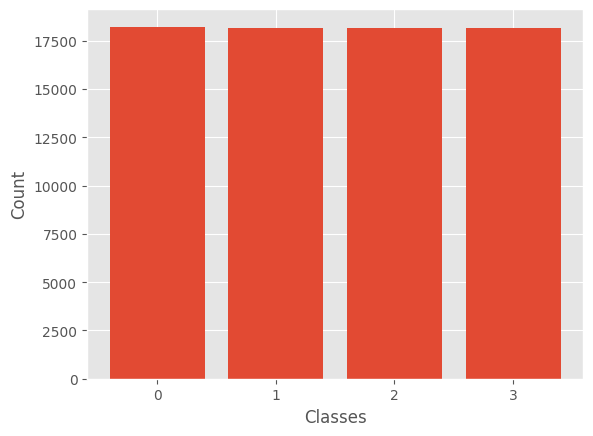

In [11]:
def child_poverty_label(x):
    if x <= q1:
        return 0
    if x > q1 and x <= q2:
        return 1
    if x> q2 and x <= q3:
        return 2

    return 3

census_imputed['ChildPoverty'] = census_imputed['ChildPoverty'].apply(child_poverty_label)
census_imputed.groupby(['ChildPoverty'])['ChildPoverty'].count()


CPC = census_imputed.groupby(['ChildPoverty'])['ChildPoverty'].count()
print(CPC)

ticks = np.unique(census_imputed['ChildPoverty'])
plt.bar(np.unique(census_imputed['ChildPoverty']), CPC)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(ticks=ticks, labels=np.unique(census_imputed['ChildPoverty']))
plt.show()

1.6 Splitting:

In [12]:
y = census_imputed['ChildPoverty']
X = census_imputed
del X['ChildPoverty']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=7324,  shuffle=True)

# Convert the Data frame to array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 35)
(58174,)
(14544, 35)
(14544,)


## 2. Pre-processing and Initial Modeling (2.5 points total)

You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.

In [13]:
def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):

    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))

    yhat = nn.predict(X_test)
    print('Testing acc:',accuracy_score(y_test,yhat))

    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Testing Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')

    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.grid(True)

### 2.1 Two-layer perception:

[.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs.

In [14]:
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W

        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)  # last layer sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2) # back prop the sensitivity

        grad2 = V2 @ A2.T # no bias on final layer
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [15]:
# mini-batching
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)


    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))

        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)

                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))

        return self

In [16]:
## Cross Entropy Loss
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)

        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

In [17]:
# proper Glorot initialization
class TLPBetterInitial(TLPMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1))
        W2[:,:1] = 0

        return W1, W2

### 2.2 Model 1: neither normalized nor one-hot encoded

In [ ]:
vals = { 'n_hidden':50,
         'C':0.01, 'epochs':60, 'eta':0.01,
         'alpha':0.1, 'decrease_const':0.1,
         'minibatches':len(X_train)/256, 'shuffle':True, 'random_state':1}

nn_cross_without = TLPBetterInitial(**vals)
nn_cross_without.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test));

Epoch: 48/60

In [ ]:
cost_avgs = [np.mean(x) for x in nn_cross_without.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Row data training loss curve')
plt.tight_layout()
plt.show()

In [ ]:
print_result(nn_cross_without,X_train,y_train,X_test,y_test,color="blue")
plt.title('Row data Testing accuracy')
plt.show()

In [ ]:
yhat_without = nn_cross_without.predict(X_test)
Acc_without=accuracy_score(y_test,yhat_without)

cm = confusion_matrix(y_test,yhat_without)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

### model 2: normalize the continuous numeric feature data

[.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.

In [ ]:
from sklearn.preprocessing import StandardScaler

Numerical_columns = census.select_dtypes(include=["number"]).columns.tolist();
Numerical_columns.remove('ChildPoverty')
Numerical_columns.remove('TractId')

normalized_values = X[Numerical_columns].values

scaler =  StandardScaler()

scaler.fit(normalized_values)
values_to_normalized = scaler.transform(normalized_values)

X_normalized =  copy.deepcopy(X)
X_normalized[Numerical_columns] = values_to_normalized

X_normalized
X_normalized.head()

In [ ]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_normalized, y,test_size=0.20,stratify=y, random_state=7324,  shuffle=True)
X_N_train = X_N_train.to_numpy()
X_N_test = X_N_test.to_numpy()
y_N_train = y_N_train.to_numpy()
y_N_test = y_N_test.to_numpy()

vals = {'n_hidden':50,
         'C':1e-2, 'epochs':40, 'eta':0.01,  'random_state':1,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train)/256,
         'shuffle':True}


nn_cross_normalized = TLPBetterInitial(**vals)
nn_cross_normalized.fit(X_N_train, y_N_train, print_progress=1, XY_test=(X_N_test, y_N_test));

In [ ]:
cost_avgs = [np.mean(x) for x in nn_cross_normalized.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Normalized data training loss curve')
plt.tight_layout()
plt.show()

In [ ]:
print_result(nn_cross_normalized,X_N_train,y_N_train,X_N_test,y_N_test,color="blue")
plt.title('Normalized data Testing accuracy')
plt.show()

In [ ]:
yhat_normalized = nn_cross_normalized.predict(X_N_test)
Acc_normalized=accuracy_score(y_N_test,yhat_normalized)

cm = confusion_matrix(y_N_test,yhat_normalized)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

### 2.4 [.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data.

Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.

In [ ]:
categorical_columns = census.select_dtypes(include=["object"]).columns.tolist();
X_encode =  copy.deepcopy(X_normalized)

tmp_df = pd.get_dummies(X_encode.State,prefix='State')
X_encode = pd.concat((X_encode,tmp_df),axis=1) # add back into the dataframe
tmp_df = pd.get_dummies(X_encode.State,prefix='County')
X_encode = pd.concat((X_encode,tmp_df),axis=1) # add back into the dataframe


del X_encode['State']
del X_encode['County']

X_encode.head()

X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_encode, y,test_size=0.20,stratify=y, random_state=7324,  shuffle=True)
X_f_train = X_f_train.to_numpy()
X_f_test = X_f_test.to_numpy()
y_f_train = y_f_train.to_numpy()
y_f_test = y_f_test.to_numpy()

X_f_train=X_f_train.astype(float)
X_f_test=X_f_test.astype(float)
y_f_train=y_f_train.astype(float)
y_f_test=y_f_test.astype(float)

vals = {'n_hidden':50,
         'C':1e-2, 'epochs':135, 'eta':0.01,
         'alpha':0.01, 'decrease_const':0.1, 'minibatches':len(X_train)/256,
         'shuffle':True,'random_state':1}

nn_cross_encode = TLPBetterInitial(**vals)
nn_cross_encode.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

cost_avgs = [np.mean(x) for x in nn_cross_encode.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Normalized-Encoded data training loss curve')
plt.tight_layout()
plt.show()

In [ ]:
print_result(nn_cross_encode,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Normalized-Encoded Testing accuracy')
plt.show()

In [ ]:
yhat_encode = nn_cross_encode.predict(X_f_test)
Acc_encode=accuracy_score(y_f_test,yhat_encode)
cm = confusion_matrix(y_f_test,yhat_encode)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

### 2.5 [1 points] Compare the performance of the three models you just trained.

Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  
Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

In [ ]:
t = 2.26 / np.sqrt(10)

e12 = (1-Acc_without)-(1-Acc_normalized)
e13 = (1-Acc_without)-(1-Acc_encode)
e23 = (1-Acc_normalized)-(1-Acc_encode)

stdtot12 = np.std(e12)
stdtot13 = np.std(e13)
stdtot23 = np.std(e23)

dbar12 = np.mean(e12)
dbar13 = np.mean(e13)
dbar23 = np.mean(e23)


print(f'1 vs. 2: The error range is from {dbar12 - t*stdtot12} to {dbar12+ t*stdtot12}')
print(f'1 vs. 3: The error range is from {dbar13 - t*stdtot13} to {dbar13+ t*stdtot13}')
print(f'2 vs. 3: The error range is from {dbar23 - t*stdtot23} to {dbar23+ t*stdtot23}')

print(''' From the result, we can't determine which model is better.\n Therefore, we will use the McNemar test for comparison as shown in the next section.
''')

In [ ]:
print('The comparison between Model1 and Model2 with 95% confidence interval is as follows:')
table1 = mcnemar_table(y_target=y_test, y_model1=yhat_without, y_model2=yhat_normalized)
chi12_, p12 = mcnemar(ary=table1, corrected=True)
print(table1)
print(f"chi² statistic: {chi12_}, p-value: {p12}")
if p12 > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that Models 1 and 2 are different from each other )")
else:
        print('Different proportions of errors (reject Null Hypothesis)')


print('The comparison between Model1 and Model3 with 95% confidence interval is as follows:')
table2 = mcnemar_table(y_target=y_test, y_model1=yhat_without, y_model2=yhat_encode)
chi13_, p13 = mcnemar(ary=table2, corrected=True)
print(table2)
print(f"chi² statistic: {chi13_}, p-value: {p13}")
if p13 > 0.05:
    print('Same proportions of errors (fail to reject Null Hypothesis)')
else:
        print('Different proportions of errors (able to reject Null Hypothesis---so based on the accuracy, Model3 is better than Model1)')


print('The comparison between Model2 and Model3 with 95% confidence interval is as follows:')
table3 = mcnemar_table(y_target=y_test, y_model1=yhat_normalized, y_model2=yhat_encode)
chi23_, p23 = mcnemar(ary=table3, corrected=True)
print(table3)
print(f"chi² statistic: {chi23_}, p-value: {p23}")
if p13 > 0.05:
    print('Same proportions of errors (fail to reject Null Hypothesis)')
else:
        print('Different proportions of errors (able to reject Null Hypothesis, so based on the accuracy Model3 is better than Model2)')



print("Based on the results above, the peformacne of Model3 is beter than Models 1 and 2")

## Modeling (5 points total)

[1 points] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.

Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

In [ ]:
class ThreeLayerPerceptronBase(object):
    def __init__(self, n1_hidden=30,n2_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n1_hidden = n1_hidden
        self.n2_hidden = n2_hidden   # Number of hidden in third layer.
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n1_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n1_hidden, self.n_features_ + 1) # reshape to be W

        W2_num_elems = (self.n1_hidden + 1)*self.n2_hidden_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n2_hidden_, self.n1_hidden + 1)

        W3_num_elems = (self.n2_hidden + 1)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n2_hidden + 1)
        return W1, W2 , W3

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))

    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2,W3)
        return cost + L2_term

    def _feedforward(self, X, W1, W2,W3):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4

    def _get_gradient(self, A1, A2, A3, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = -2*(Y_enc-A4)*A4*(1-A4)  # last layer sensitivity
        V2 = A3*(1-A3)*(W3.T @ V3) # back prop the sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:]) # back prop the sensitivity


        grad3 = V3 @ A3.T # no bias on final layer
        grad2 = V2[1:,:] @ A2.T # dont back prop sensitivity of bias
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        return grad1, grad2, grad3

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _,_, _, A4 = self._feedforward(X, self.W1, self.W2,self.W3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

In [ ]:
# mini-batching
class THLPMiniBatch(ThreeLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)


    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 , self.W3 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))



        # You will update These arrays, initialized here
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)


        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []

            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2,A3, Z3, A4 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3)

                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 ,grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2, W3=self.W3)


                mini_grad1.append(grad1)
                mini_grad2.append(grad2)
                mini_grad3.append(grad3)
                # momentum calculations
                rho_W1, rho_W2 , rho_W3 = eta * grad1, eta * grad2,eta * grad3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2 , rho_W3
            # # keep track of the
            # #    average magnitude of gradient of each layer
            # #    grad_w1_ and grad_w2_
            # #    and make the eta values for each adaptive

            # a = np.mean(np.abs(grad1))
            # b = np.mean(np.abs(grad2))
            # c = np.mean(np.abs(grad3))

            # grad1 *= 2*c/(a+b+c) #mixin parameters
            # grad2 *= 2*a/(a+b+c)
            # grad3 *= 2*b/(a+b+c)

            # # Track the magnitude of the gradient
            # self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            # self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            # self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))

            # #Update weights and biases
            # self.W1 -= self.eta * grad1
            # self.W2 -= self.eta * grad2
            # self.W3 -= self.eta * grad3

            # # Track the magnitude of the gradient update here
            # # This should be AFTER applying your dynamic scaling
            # # That is, you SHOULD include eta here.
            # self.update_w1_[i] = np.mean(np.abs(grad1))
            # self.update_w2_[i] = np.mean(np.abs(grad2))
            # self.update_w3_[i] = np.mean(np.abs(grad3))
            # Track the magnitude of the gradient
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))

        return self

In [ ]:
# Cross Entropy Loss
class THLPMiniBatchCrossEntropy(THLPMiniBatch):
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1, W2,W3)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2 ,W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4-Y_enc) # <- this is only line that changed
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])

        grad3 = V3 @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C

        return grad1, grad2 , grad3

In [ ]:
# proper Glorot initialization
class THLPBetterInitial(THLPMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n1_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n1_hidden, self.n_features_ + 1))
        W1[:,:1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4*np.sqrt(6 / (self.n2_hidden + self.n1_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n2_hidden, self.n1_hidden + 1))
        W2[:,:1] = 0

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n2_hidden + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n2_hidden + 1))
        W3[:,:1] = 0

        return W1, W2,W3

In [ ]:
vals = {'n1_hidden':70, 'n2_hidden':50,
         'C':1e-2, 'epochs':120, 'eta':0.01, 'random_state':1,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train)/256,
         'shuffle':True}

nn_cross_three = THLPBetterInitial(**vals)
nn_cross_three.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

In [ ]:
print_result(nn_cross_three,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for three layer ')
plt.show()

In [ ]:
cost_avgs = [np.mean(x) for x in nn_cross_three.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve of three layer')
plt.tight_layout()
plt.show()

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_three.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_three.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_three.grad_w3_[10:]), label='w3')
plt.legend()
plt.title('Three layer')
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

In [ ]:
yhat_three = nn_cross_three.predict(X_f_test)
Acc_three=accuracy_score(y_f_test,yhat_three)
cm = confusion_matrix(y_f_test,yhat_three)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

[1 points] Repeat the previous step, adding support for a fourth layer.

In [ ]:
class FourLayerPerceptronBase(object):
    def __init__(self, n1_hidden=30,n2_hidden=30,n3_hidden=10,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n1_hidden = n1_hidden
        self.n2_hidden = n2_hidden   # Number of hidden in third layer.
        self.n3_hidden = n3_hidden   # Number of hidden in fourth layer.
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n1_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n1_hidden, self.n_features_ + 1) # reshape to be W

        W2_num_elems = (self.n1_hidden + 1)*self.n2_hidden_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n2_hidden_, self.n1_hidden + 1)

        W3_num_elems = (self.n2_hidden + 1)*self.n3_hidden_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n3_hidden_, self.n2_hidden + 1)


        W4_num_elems = (self.n3_hidden + 1)*self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n3_hidden + 1)
        return W1, W2 , W3 , W4

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2)++ np.mean(W4[:, 1:] ** 2))

    def _cost(self,A5,Y_enc,W1, W2, W3, W4):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A5)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1

        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2

        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3

        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4

        A5 = self._sigmoid(Z4)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = -2*(Y_enc-A5)*A5*(1-A5)  # last layer sensitivity
        V3 = A4*(1-A4)*(W4.T @ V4) # back prop the sensitivity
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:]) # back prop the sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:]) # back prop the sensitivity


        grad4 = V4 @ A4.T # no bias on final layer
        grad3 = V3[1:,:] @ A3.T # dont back prop sensitivity of bias
        grad2 = V2[1:,:] @ A2.T # dont back prop sensitivity of bias
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        return grad1, grad2, grad3, grad4


    def predict(self, X):
        """Predict class labels"""
        _, _, _, _,_, _,_, _,  A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred



# mini-batching
class FLPMiniBatch(FourLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)


    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 , self.W3 ,self.W4 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)


        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))



        # You will update These arrays, initialized here
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)


        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []

            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2,A3, Z3,A4, Z4, A5 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4)

                cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 ,grad3,grad4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4)


                mini_grad1.append(grad1)
                mini_grad2.append(grad2)
                mini_grad3.append(grad3)
                mini_grad4.append(grad4)

                # momentum calculations
                rho_W1, rho_W2 , rho_W3 , rho_W4 = eta * grad1, eta * grad2,eta * grad3 ,eta * grad4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))

                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2 , rho_W3, rho_W4

                        # Track the magnitude of the gradient
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))
            self.grad_w4_[i] = np.mean(np.abs(np.mean(mini_grad4[:])))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))

        return self


# Cross Entropy Loss

class FLPMiniBatchCrossEntropy(FLPMiniBatch):
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A5)+(1-Y_enc)*np.log(1-A5))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2 ,W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = (A5-Y_enc) # <- this is only line that changed
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:])
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])

        grad4 = V4 @ A4.T
        grad3 = V3[1:,:] @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C

        return grad1, grad2 , grad3 , grad4



# proper Glorot initialization

class FLPBetterInitial(FLPMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n1_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n1_hidden, self.n_features_ + 1))
        W1[:,:1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4*np.sqrt(6 / (self.n2_hidden + self.n1_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n2_hidden, self.n1_hidden + 1))
        W2[:,:1] = 0

        init_bound = 4*np.sqrt(6 / (self.n3_hidden + self.n2_hidden + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n3_hidden, self.n2_hidden + 1))
        W3[:,:1] = 0

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n3_hidden + 1))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n3_hidden + 1))
        W4[:,:1] = 0

        return W1, W2, W3, W4

In [ ]:
vals2 = {'n1_hidden':70, 'n2_hidden':50, 'n3_hidden':30,
         'C':1e-2, 'epochs':140, 'eta':0.01, 'random_state':1,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train)/256,
         'shuffle':True}

nn_cross_four = FLPBetterInitial(**vals2)
nn_cross_four.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

print_result(nn_cross_four,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for four layer')
plt.show()

In [ ]:
cost_avgs = [np.mean(x) for x in nn_cross_four.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for four layer perceptrons')
plt.tight_layout()
plt.show()

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_four.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_four.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_four.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_cross_four.grad_w4_[10:]), label='w4')
plt.legend()
plt.title('Four layer perceptrons')
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

In [ ]:
yhat_four = nn_cross_four.predict(X_f_test)
Acc_four=accuracy_score(y_f_test,yhat_four)
cm = confusion_matrix(y_f_test,yhat_four)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

[1 points] Repeat the previous step, adding support for a fifth layer.

In [ ]:
class FiveLayerPerceptronBase(object):
    def __init__(self, n1_hidden=30,n2_hidden=30,n3_hidden=10,n4_hidden=8,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n1_hidden = n1_hidden
        self.n2_hidden = n2_hidden   # Number of hidden in third layer.
        self.n3_hidden = n3_hidden   # Number of hidden in fourth layer.
        self.n4_hidden = n4_hidden   # Number of hidden in fourth layer.
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n1_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n1_hidden, self.n_features_ + 1) # reshape to be W

        W2_num_elems = (self.n1_hidden + 1)*self.n2_hidden_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n2_hidden_, self.n1_hidden + 1)

        W3_num_elems = (self.n2_hidden + 1)*self.n3_hidden_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n3_hidden_, self.n2_hidden + 1)

        W4_num_elems = (self.n3_hidden + 1)*self.n4_hidden_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W3.reshape(self.n4_hidden_, self.n3_hidden + 1)

        W5_num_elems = (self.n4_hidden + 1)*self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W4.reshape(self.n_output_, self.n4_hidden + 1)
        return W1, W2 , W3 , W4 , W5

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4,W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2)
                                       + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2))

    def _cost(self,A6,Y_enc,W1, W2, W3, W4, W5):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A6)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1

        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2

        A3 = self._sigmoid(Z2)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3

        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4

        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5

        A6 = self._sigmoid(Z5)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def _get_gradient(self, A1, A2, A3, A4, A5,A6, Z1, Z2, Z3, Z4, Z5,  Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = -2*(Y_enc-A6)*A6*(1-A6)  # last layer sensitivity
        V4 = A5*(1-A5)*(W5.T @ V5) # back prop the sensitivity
        V3 = A4*(1-A4)*(W4.T @ V4[1:,:]) # back prop the sensitivity
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:]) # back prop the sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:]) # back prop the sensitivity


        grad5 = V5 @ A5.T # no bias on final layer
        grad4 = V4[1:,:] @ A4.T # dont back prop sensitivity of bias
        grad3 = V3[1:,:] @ A3.T # dont back prop sensitivity of bias
        grad2 = V2[1:,:] @ A2.T # dont back prop sensitivity of bias
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        grad5[:, 1:] += W5[:, 1:] * self.l2_C
        return grad1, grad2, grad3, grad4 , grad5


    def predict(self, X):
        """Predict class labels"""
        _, _, _, _,_, _,_, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred



# mini-batching
class FiLPMiniBatch(FiveLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0,
                 decrease_iter = 10,shuffle=True,
                 minibatches=1, **kwds):
        # need to add to the original initializer
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)


    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 , self.W3 ,self.W4 ,self.W5 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)


        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))



        # You will update These arrays, initialized here
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)


        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []
            mini_grad5 = []

            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2,A3, Z3,A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.W3,
                                                       self.W4,
                                                       self.W5)

                cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 ,grad3,grad4 ,grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5,A6 =A6,
                                                  Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)


                mini_grad1.append(grad1)
                mini_grad2.append(grad2)
                mini_grad3.append(grad3)
                mini_grad4.append(grad4)
                mini_grad5.append(grad5)

                # momentum calculations
                rho_W1, rho_W2 , rho_W3 , rho_W4 ,rho_W5 = eta * grad1, eta * grad2,eta * grad3 ,eta * grad4 ,eta * grad5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))

                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev ,rho_W5_prev = rho_W1, rho_W2 , rho_W3, rho_W4 , rho_W5

                        # Track the magnitude of the gradient
            self.grad_w1_[i] = np.mean(np.abs(np.mean(mini_grad1[:])))
            self.grad_w2_[i] = np.mean(np.abs(np.mean(mini_grad2[:])))
            self.grad_w3_[i] = np.mean(np.abs(np.mean(mini_grad3[:])))
            self.grad_w4_[i] = np.mean(np.abs(np.mean(mini_grad4[:])))
            self.grad_w5_[i] = np.mean(np.abs(np.mean(mini_grad5[:])))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))

        return self


# Cross Entropy Loss

class FiLPMiniBatchCrossEntropy(FiLPMiniBatch):
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6)+(1-Y_enc)*np.log(1-A6))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2 ,W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6-Y_enc) # <- this is only line that changed
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4[1:,:])
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:])
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])

        grad5 = V5 @ A5.T
        grad4 = V4[1:,:] @ A4.T
        grad3 = V3[1:,:] @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        grad5[:, 1:] += W5[:, 1:] * self.l2_C

        return grad1, grad2 , grad3 , grad4 ,grad5



# proper Glorot initialization

class FiLPBetterInitial(FiLPMiniBatchCrossEntropy):
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n1_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n1_hidden, self.n_features_ + 1))
        W1[:,:1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4*np.sqrt(6 / (self.n2_hidden + self.n1_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n2_hidden, self.n1_hidden + 1))
        W2[:,:1] = 0

        init_bound = 4*np.sqrt(6 / (self.n3_hidden + self.n2_hidden + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n3_hidden, self.n2_hidden + 1))
        W3[:,:1] = 0

        init_bound = 4*np.sqrt(6 / (self.n4_hidden + self.n3_hidden + 1))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n4_hidden, self.n3_hidden + 1))
        W4[:,:1] = 0

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n4_hidden + 1))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n4_hidden + 1))
        W5[:,:1] = 0

        return W1, W2, W3, W4 ,W5

In [ ]:
vals5 = {'n1_hidden':70, 'n2_hidden':50, 'n3_hidden':30,  'n4_hidden':10,
         'C':1e-2, 'epochs':120, 'eta':0.01, 'random_state':1,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train)/256,
         'shuffle':True}

nn_cross_five = FiLPBetterInitial(**vals5)
nn_cross_five.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

print_result(nn_cross_five,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for five layer')
plt.show()

In [ ]:
cost_avgs = [np.mean(x) for x in nn_cross_five.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for five layer perceptrons')
plt.tight_layout()
plt.show()

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_cross_five.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_cross_five.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_cross_five.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_cross_five.grad_w4_[10:]), label='w4')
plt.plot(np.abs(nn_cross_five.grad_w5_[10:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.title('Five layer perceptrons')
plt.xlabel('Iteration')
plt.show()

In [ ]:
yhat_five = nn_cross_five.predict(X_f_test)
Acc_five=accuracy_score(y_f_test,yhat_five)
cm = confusion_matrix(y_f_test,yhat_five)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

[2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (choose either RMSProp or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

In [ ]:
class FiLPRMSProp(FiLPBetterInitial):

    def __init__(self, eps=0.0, gamma=0.0, **kwds):
        # need to add to the original initializer
        self.eps = eps
        self.gamma = gamma
        # but keep other keywords
        super().__init__(**kwds) ##


    def fit(self, X, y, print_progress=False, XY_test=None):

        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

                 # keep track of gradients of each epoch
        V1_prev = np.zeros(self.W1.shape)
        V2_prev = np.zeros(self.W2.shape)
        V3_prev = np.zeros(self.W3.shape)
        V4_prev = np.zeros(self.W4.shape)
        V5_prev = np.zeros(self.W5.shape)

                # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_W3_prev = np.zeros(self.W3.shape) # for momentum
        rho_W4_prev = np.zeros(self.W4.shape) # for momentum
        rho_W5_prev = np.zeros(self.W5.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))



        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)

        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []
            mini_grad5 = []

            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5,Z5, A6 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2, self.W3, self.W4,self.W5)

                cost = self._cost(A6, Y_enc[:, idx],self.W1,self.W2, self.W3,self.W4, self.W5 )
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradW3, gradW4, gradW5  = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5,
                                                  A6=A6,
                                                  Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,Z5=Z5,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2, W3=self.W3,
                                                  W4=self.W4, W5=self.W5)


                V1 = self.gamma*V1_prev + (1-self.gamma)*gradW1*gradW1
                V2 = self.gamma*V2_prev + (1-self.gamma)*gradW2*gradW2
                V3 = self.gamma*V3_prev + (1-self.gamma)*gradW3*gradW3
                V4 = self.gamma*V4_prev + (1-self.gamma)*gradW4*gradW4
                V5 = self.gamma*V5_prev + (1-self.gamma)*gradW5*gradW5


                # momentum and adagrad
                rho_W1, rho_W2,rho_W3,rho_W4,rho_W5 = eta * gradW1/np.sqrt(V1 +self.eps), eta * gradW2/np.sqrt(V2 +self.eps),eta * gradW3/np.sqrt(V3+self.eps),eta * gradW4/np.sqrt(V4+self.eps),eta * gradW5/np.sqrt(V5+self.eps)
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev)) # update with momentum
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev)) # update with momentum
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev)) # update with momentum


                # update previous parameters for the
                rho_W1_prev, rho_W2_prev,rho_W3_prev,rho_W4_prev,rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5
                V1_prev, V2_prev, V3_prev, V4_prev, V5_prev = V1, V2, V3,V4,V5


                 # keep track of gradients of each minibach in each epoch
                mini_grad1.append(gradW1)
                mini_grad2.append(gradW2)
                mini_grad3.append(gradW3)
                mini_grad4.append(gradW4)
                mini_grad5.append(gradW5)




            self.grad_w1_[i] = np.mean(np.abs((np.mean(mini_grad1[:]))))
            self.grad_w2_[i] = np.mean(np.abs((np.mean(mini_grad2[:]))))
            self.grad_w3_[i] = np.mean(np.abs((np.mean(mini_grad3[:]))))
            self.grad_w4_[i] = np.mean(np.abs((np.mean(mini_grad4[:]))))
            self.grad_w5_[i] = np.mean(np.abs((np.mean(mini_grad5[:]))))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))


        return self

In [ ]:
vals_Ap = {'n1_hidden':70, 'n2_hidden':50, 'n3_hidden':30,  'n4_hidden':10,
         'C':1e-2, 'epochs':120, 'eta':0.01, 'random_state':1, 'decrease_iter':20, 'eps':1e-3, 'gamma':0.9,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train)/256,
         'shuffle':True}

nn_Ap = FiLPRMSProp(**vals_Ap)
nn_Ap.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

print_result(nn_Ap,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for five layer')
plt.show()

In [ ]:
cost_avgs = [np.mean(x) for x in nn_Ap.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for five layer perceptrons with RMSProp')

plt.tight_layout()
plt.show()

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_Ap.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_Ap.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_Ap.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_Ap.grad_w4_[10:]), label='w4')
plt.plot(np.abs(nn_Ap.grad_w5_[10:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.title('Five layer perceptrons with RMSProp')
plt.xlabel('Iteration')
plt.show()

In [ ]:
yhat_five_RMSProp = nn_Ap.predict(X_f_test)
Acc_five_RMSProp=accuracy_score(y_f_test,yhat_five_RMSProp)
cm = confusion_matrix(y_f_test,yhat_five_RMSProp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

In [ ]:
# Comparison:

print('The comparison between FLP "without RMSProp" and "with RMSProp" with 95% confidence interval is as follows:')
table = mcnemar_table(y_target=y_test, y_model1=yhat_five, y_model2=yhat_five_RMSProp)
chi2_, p = mcnemar(ary=table1, corrected=True)
print(table)
print(f"chi² statistic: {chi2_}, p-value: {p}")
if p > 0.05:
    print("Same proportions of errors (fail to reject Null Hypothesis--There isn't enough evidence to suggest that the Five Layer Perceptron models with and without RMSProp are different from each other)")
else:
        print('Different proportions of errors (reject H0)')




print(f'                   With RMSProp              Without RMSProp')

print(f' Accuracy        {Acc_five_RMSProp}          {Acc_five}')


## Exceptional Work (1 points total)

### Adaptive Momentum (Adam) Application in the Five-Layer Perceptron.

Adam is a deep neural network training technique that uses adaptive learning rate optimization. It combines the benefits of AdaGrad and RMSProp, two more stochastic gradient descent additions. Adam uses momentum to enhance convergence and calculates adaptive learning rates for every parameter.

In [ ]:
class FiLPAdam(FiLPBetterInitial):
    def __init__(self, eps=1e-7, beta1=0.9, beta2=0.999, **kwds):
        # Initialize AdaM parameters
        self.eps = eps
        self.beta1 = beta1
        self.beta2 = beta2
        # Initialize with other keywords
        super().__init__(**kwds)

    def fit(self, X, y, print_progress=False, XY_test=None):
        # Track gradients of each epoch
        self.grad_w1_ = np.zeros(self.epochs)
        self.grad_w2_ = np.zeros(self.epochs)
        self.grad_w3_ = np.zeros(self.epochs)
        self.grad_w4_ = np.zeros(self.epochs)
        self.grad_w5_ = np.zeros(self.epochs)

        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # Initialize weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # Get initial accuracy
        self.score_.append(accuracy_score(y_data, self.predict(X_data)))
        # Track validation if provided
        if XY_test is not None:
            X_test, y_test = XY_test
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))

        M1_prev = np.zeros_like(self.W1)
        M2_prev = np.zeros_like(self.W2)
        M3_prev = np.zeros_like(self.W3)
        M4_prev = np.zeros_like(self.W4)
        M5_prev = np.zeros_like(self.W5)

        V1_prev = np.zeros_like(self.W1)
        V2_prev = np.zeros_like(self.W2)
        V3_prev = np.zeros_like(self.W3)
        V4_prev = np.zeros_like(self.W4)
        V5_prev = np.zeros_like(self.W5)

        for epoch in range(self.epochs):
            if print_progress > 0 and (epoch + 1) % print_progress == 0:
                sys.stderr.write(f'\rEpoch: {epoch + 1}/{self.epochs}')
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini_batches = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            mini_grad1 = []
            mini_grad2 = []
            mini_grad3 = []
            mini_grad4 = []
            mini_grad5 = []

            for idx in mini_batches:
                # Feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx],
                                                                               self.W1,
                                                                               self.W2, self.W3, self.W4, self.W5)

                cost = self._cost(A6, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)
                mini_cost.append(cost)  # Append cost of mini-batch

                # Compute gradient via backpropagation
                G1, G2, G3, G4, G5 = self._get_gradient(A1, A2, A3, A4, A5, A6,
                                                        Z1, Z2, Z3, Z4, Z5,
                                                        Y_enc[:, idx],
                                                        self.W1, self.W2, self.W3, self.W4, self.W5)

                M1 = self.beta1 * M1_prev + (1 - self.beta1) * G1
                M2 = self.beta1 * M2_prev + (1 - self.beta1) * G2
                M3 = self.beta1 * M3_prev + (1 - self.beta1) * G3
                M4 = self.beta1 * M4_prev + (1 - self.beta1) * G4
                M5 = self.beta1 * M5_prev + (1 - self.beta1) * G5

                V1 = self.beta2 * V1_prev + (1 - self.beta2) * (G1 ** 2)
                V2 = self.beta2 * V2_prev + (1 - self.beta2) * (G2 ** 2)
                V3 = self.beta2 * V3_prev + (1 - self.beta2) * (G3 ** 2)
                V4 = self.beta2 * V4_prev + (1 - self.beta2) * (G4 ** 2)
                V5 = self.beta2 * V5_prev + (1 - self.beta2) * (G5 ** 2)

                M1_hat = M1 / (1 - self.beta1 ** (epoch + 1))
                M2_hat = M2 / (1 - self.beta1 ** (epoch + 1))
                M3_hat = M3 / (1 - self.beta1 ** (epoch + 1))
                M4_hat = M4 / (1 - self.beta1 ** (epoch + 1))
                M5_hat = M5 / (1 - self.beta1 ** (epoch + 1))

                V1_hat = V1 / (1 - self.beta2 ** (epoch + 1))
                V2_hat = V2 / (1 - self.beta2 ** (epoch + 1))
                V3_hat = V3 / (1 - self.beta2 ** (epoch + 1))
                V4_hat = V4 / (1 - self.beta2 ** (epoch + 1))
                V5_hat = V5 / (1 - self.beta2 ** (epoch + 1))

                self.W1 -= self.eta * (M1_hat / (np.sqrt(V1_hat) + self.eps))
                self.W2 -= self.eta * (M2_hat / (np.sqrt(V2_hat) + self.eps))
                self.W3 -= self.eta * (M3_hat / (np.sqrt(V3_hat) + self.eps))
                self.W4 -= self.eta * (M4_hat / (np.sqrt(V4_hat) + self.eps))
                self.W5 -= self.eta * (M5_hat / (np.sqrt(V5_hat) + self.eps))

                M1_prev, M2_prev, M3_prev, M4_prev, M5_prev = M1, M2, M3, M4, M5
                V1_prev, V2_prev, V3_prev, V4_prev, V5_prev = V1, V2, V3, V4, V5

                mini_grad1.append(G1)
                mini_grad2.append(G2)
                mini_grad3.append(G3)
                mini_grad4.append(G4)
                mini_grad5.append(G5)

            self.grad_w1_[epoch] = np.mean(np.abs(np.mean(mini_grad1)))
            self.grad_w2_[epoch] = np.mean(np.abs(np.mean(mini_grad2)))
            self.grad_w3_[epoch] = np.mean(np.abs(np.mean(mini_grad3)))
            self.grad_w4_[epoch] = np.mean(np.abs(np.mean(mini_grad4)))
            self.grad_w5_[epoch] = np.mean(np.abs(np.mean(mini_grad5)))

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data, self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test, self.predict(X_test)))

        return self


In [ ]:
vals_Adam = {'n1_hidden':70, 'n2_hidden':50, 'n3_hidden':30,  'n4_hidden':10, 'beta1':0.999,'beta2':0.9999,
         'C':1e-2, 'epochs':250, 'eta':0.01, 'random_state':3000, 'decrease_iter':20,'eps':1e-7,
         'alpha':0.1, 'decrease_const':0.1, 'minibatches':len(X_train)/256,
         'shuffle':True}

nn_Adam = FiLPAdam(**vals_Adam)
nn_Adam.fit(X_f_train, y_f_train, print_progress=1, XY_test=(X_f_test, y_f_test));

print_result(nn_Adam,X_f_train,y_f_train,X_f_test,y_f_test,color="blue")
plt.title('Testing accuracy for five layer')
plt.show()

In [ ]:
cost_avgs = [np.mean(x) for x in nn_Adam.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss curve for five layer perceptrons with Adam')
plt.tight_layout()
plt.show()

In [ ]:
ax = plt.subplot(1,1,1)
plt.plot(np.abs(nn_Adam.grad_w1_[10:]), label='w1')
plt.plot(np.abs(nn_Adam.grad_w2_[10:]), label='w2')
plt.plot(np.abs(nn_Adam.grad_w3_[10:]), label='w3')
plt.plot(np.abs(nn_Adam.grad_w4_[10:]), label='w4')
plt.plot(np.abs(nn_Adam.grad_w5_[10:]), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.title('Five layer perceptrons with RMSProp')
plt.show()

In [ ]:
yhat_five_Adam = nn_Adam.predict(X_f_test)
Acc_five_Adam =accuracy_score(y_f_test,yhat_five_Adam)
cm = confusion_matrix(y_f_test,yhat_five_Adam)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)

plt.show()

In [ ]:
# Statistical Comparison between RMSProp and AdaM Adaptive Learning Techniques

print('The comparison between FLP "RMSProp" and "Adam" with 95% confidence interval is as follows:')
table = mcnemar_table(y_target=y_test, y_model1=yhat_five_RMSProp, y_model2=yhat_five_Adam)
chi2_, p = mcnemar(ary=table, corrected=True)
print(table)
print(f"chi² statistic: {chi2_}, p-value: {p}")
if p > 0.05:
    print("Same proportions of errors (failed to reject Null Hypothesis--There isn't enough evidence to suggest that the Five Layer Perceptron models with RMSProp and AdaM Adaptive Learning Techniques are different from each other)")
else:
    print("Different proportions of errors (reject H0)")

print('----------------------------------------------------------------')
print(f'                   With RMSProp             With AdaM')
print('----------------------------------------------------------------')
print(f' Accuracy        {Acc_five_RMSProp:.4f}          {Acc_five_Adam:.4f}')
print('----------------------------------------------------------------')


We can see from the data that, on average, the AdaM optimizer performs the best

---

in terms of accuracy and consistent loss function convergence. This reveals how good AdaM is at training deep neural networks.